In [19]:
from ipynb.fs.full.Chapter_4 import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [20]:
# Estimating the Gradient

from typing import Callable

def difference_qoutient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

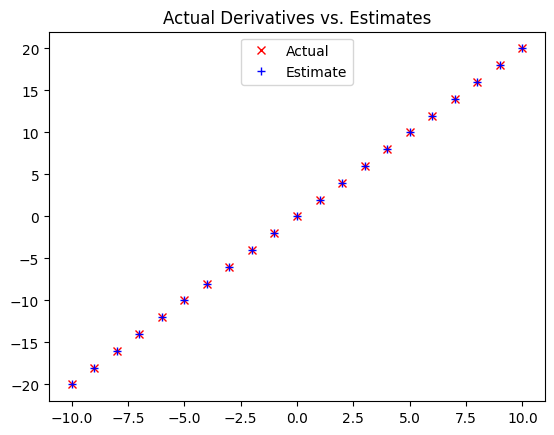

In [21]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_qoutient(square, x, h=0.001) for x in xs]

# float to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # red x
plt.plot(xs, estimates, 'b+', label='Estimate') # blue +
plt.legend(loc=9)
plt.show()

In [22]:
def partial_difference_qoutient(f: Callable[[Vector], float], v: Vector, i: int, h: float) -> float:
    """Returns the i-th partial difference qoutient of f at v"""
    w = [v_j + (h if j == i else 0) # add h go just the i-th element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float], v: Vector, h: float = 0.0001):
    return [partial_difference_qoutient(f, v, i, h) for i in range(len(v))]

In [23]:
# Using the Gradient

import random
from ipynb.fs.full.Chapter_4 import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pic a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute the gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001 # v should be close to 0

0 [-4.77884327410707, -5.280351305160227, -4.293328300495608]
1 [-4.683266408624928, -5.174744279057022, -4.207461734485696]
2 [-4.58960108045243, -5.071249393475882, -4.123312499795982]
3 [-4.497809058843381, -4.9698244056063645, -4.040846249800063]
4 [-4.407852877666514, -4.870427917494237, -3.9600293248040614]
5 [-4.319695820113184, -4.773019359144352, -3.8808287383079803]
6 [-4.23330190371092, -4.677558971961465, -3.803212163541821]
7 [-4.1486358656367015, -4.584007792522236, -3.7271479202709843]
8 [-4.065663148323967, -4.492327636671791, -3.6526049618655647]
9 [-3.9843498853574877, -4.402481083938356, -3.5795528626282533]
10 [-3.9046628876503378, -4.314431462259589, -3.5079618053756882]
11 [-3.826569629897331, -4.228142833014397, -3.4378025692681744]
12 [-3.750038237299384, -4.1435799763541095, -3.369046517882811]
13 [-3.6750374725533965, -4.060708376827027, -3.3016655875251546]
14 [-3.6015367231023285, -3.9794942092904866, -3.2356322757746514]
15 [-3.529505988640282, -3.899904325

In [24]:
# Using Gradient Descent to Fit Models

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept       # The prediction of the model.
    error = (predicted - y)                 # error is (predicted - actual).
    squared_error = error ** 2              # we'll minimize squared error
    grad = [2 * error * x, 2 * error]       # using its gradient.
    return grad

In [25]:
from ipynb.fs.full.Chapter_4 import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradient
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.72395681292711, 0.5301220130714106]
1 [10.841650927790688, 0.552785725858195]
2 [26.10417161688946, 0.5525218053342692]
3 [15.924070053340067, 0.5675209333404901]
4 [22.714212795355518, 0.5723099615271493]
5 [18.185192375459394, 0.5838795543994505]
6 [21.206060565122982, 0.590896987666111]
7 [19.191148500050637, 0.6009212542559017]
8 [20.53510487172048, 0.6089105602474405]
9 [19.638693961122687, 0.6182278439986661]
10 [20.236609355775165, 0.6266300822717915]
11 [19.837808189780237, 0.6356134314630231]
12 [20.103817550848046, 0.6441800127898772]
13 [19.926397873597143, 0.6529954703151455]
14 [20.04474561378102, 0.6616158772481124]
15 [19.965816291485307, 0.6703373911073972]
16 [20.018470870970408, 0.6789625326166677]
17 [19.983358891595355, 0.6876230784224048]
18 [20.00678724238432, 0.6962311911571554]
19 [19.991169140520817, 0.7048455160172253]
20 [20.001595028788632, 0.7134269941257116]
21 [19.994649542792107, 0.7220017351662489]
22 [19.99929075669283, 0.7305523812387085]
23 [19

In [26]:
# Minibatch and Stochastic Gradient Descent

from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type "generic" functions

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator:
    """Generates 'batch_size' -sized minibatch from the dataset"""
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts) # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [27]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
  for batch in minibatches(inputs,batch_size=20):
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in batch])
    theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)
slope, intercept = theta
print("斜率：",slope)
print("截距：",intercept)
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [19.676095138881653, -2.1045459937816156]
1 [16.73565323883563, -1.8984523633803676]
2 [19.679471038721513, -2.068038407280798]
3 [19.705078790964556, -1.7484251555418364]
4 [20.236147879358715, -1.6211582188777913]
5 [20.45803264534876, -1.5740106932296174]
6 [21.35845612490063, -1.522052961699865]
7 [18.562181616299195, -1.391041360396054]
8 [20.293269495828614, -1.3041438049063458]
9 [20.10245347011566, -1.3035519677875786]
10 [19.37816642750968, -1.2396505673997156]
11 [19.663882867625546, -1.1862857219651672]
12 [21.224500492526662, -1.1091490638518167]
13 [20.519522809563718, -1.109993256413917]
14 [21.27037911439463, -1.0652901073965437]
15 [20.197512627714087, -1.1275733816398088]
16 [21.001090111025746, -0.9943003011825307]
17 [21.296090032176902, -0.9658580800293318]
18 [19.49660130951872, -0.866353225824773]
19 [19.62928471989967, -0.8565845052448202]
20 [19.74932240739629, -0.5479337632391637]
21 [20.178262006372076, -0.5102347922539165]
22 [19.77027586311124, -0.26083188

In [29]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.10034898835372, 0.005421135199265113]
1 [20.096042977133383, 0.2197073750635184]
2 [20.09192237780363, 0.4247999160452491]
3 [20.087978575683593, 0.6210932156756069]
4 [20.084203980624956, 0.808964794732336]
5 [20.080591298185517, 0.9887759760915075]
6 [20.07713362479223, 1.1608725807752358]
7 [20.07382430047937, 1.3255855934361136]
8 [20.07065696577015, 1.483231798134261]
9 [20.067625504185592, 1.6341143873056259]
10 [20.06472411881734, 1.778523545479079]
11 [20.06194720532733, 1.9167370073199606]
12 [20.05928943048253, 2.049020591343539]
13 [20.05674570332004, 2.175628711988984]
14 [20.054311106624574, 2.2968048682435542]
15 [20.051980955909798, 2.412782111560969]
16 [20.049750774527066, 2.523783494665888]
17 [20.047616268954197, 2.63002250047018]
18 [20.045573361186808, 2.7317034531704674]
19 [20.043618080593788, 2.8290219103085423]
20 [20.04174669235215, 2.9221650390444576]
21 [20.039955616043837, 3.011311977215058]
22 [20.038241362796477, 3.096634176422675]
23 [20.0366006793